In [1]:
from math import sqrt

import numpy as np
import torch
from lcmr.grammar import Scene
from lcmr.renderer.renderer2d import OpenGLRenderer2D
from lcmr.utils.presentation import display_img

from lcmr_ext.renderer.renderer2d import PyDiffVgRenderer2D, PyTorch3DRenderer2D, SoftRasRenderer2D

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [2]:
translation = torch.tensor([[0.5, 0.5], [0.5, 0.5], [0.5, 0.5]], dtype=torch.float32)[None, None, ...]
color = torch.tensor([[0.9, 0, 0], [0, 0.9, 0], [0, 0, 0.9]], dtype=torch.float32)[None, None, ...]
scale = torch.tensor([[0.1, 0.5], [0.1, 0.1], [0.2, 0.2]], dtype=torch.float32)[None, None, ...]
confidence = torch.tensor([[0.9], [0.5], [0.2]], dtype=torch.float32)[None, None, ...]
angle = torch.tensor([[-np.pi / 4], [0], [0]], dtype=torch.float32)[None, None, ...]
example_scene1 = Scene.from_tensors_sparse(translation=translation, scale=scale, color=color, confidence=confidence, angle=angle)

translation = torch.tensor([[0, 0], [0, 1], [1, 0]], dtype=torch.float32)[None, None, ...]
example_scene2 = Scene.from_tensors_sparse(translation=translation, scale=scale, color=color, confidence=confidence, angle=angle)

example_scene3 = Scene.from_tensors_sparse(
    translation=translation.reshape((1, 3, 1, -1)),
    scale=scale.reshape((1, 3, 1, -1)),
    color=color.reshape((1, 3, 1, -1)),
    confidence=confidence.reshape((1, 3, 1, -1)),
    angle=angle.reshape((1, 3, 1, -1)),
)

In [3]:
from lcmr.utils.elliptic_fourier_descriptors import elliptic_fourier_descriptors

h = sqrt(3) / 2
square = torch.tensor([[[0, 0], [0, 1], [1, 1], [1, 0], [0, 0]]], dtype=torch.float32)
hourglass = torch.tensor([[[0, 0], [0.5, h], [0, 2 * h], [1, 2 * h], [0.5, h], [1, 0], [0, 0]]], dtype=torch.float32)


translation = torch.tensor([[0.9, 0.6], [0.4, 0.5]], dtype=torch.float32)[None, None, ...]
color = torch.tensor([[0.9, 0, 0], [0.0, 0.9, 0]], dtype=torch.float32)[None, None, ...]
scale = torch.tensor([[0.5, 0.5], [0.5, 0.5]], dtype=torch.float32)[None, None, ...]
confidence = torch.tensor([[0.9], [0.9]], dtype=torch.float32)[None, None, ...]
angle = torch.tensor([[0.0], [1.0]], dtype=torch.float32)[None, None, ...]

efd = torch.cat(
    [
        elliptic_fourier_descriptors(square, order=16, normalize=True),
        elliptic_fourier_descriptors(hourglass, order=16, normalize=True),
    ],
    dim=0,
)[None, None]


objectShape = torch.tensor([[2], [2]], dtype=torch.uint8)[None, None, ...]

example_scene4 = Scene.from_tensors_sparse(translation=translation, scale=scale, color=color, confidence=confidence, angle=angle, efd=efd, objectShape=objectShape)

------------------


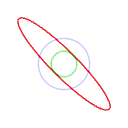

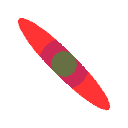

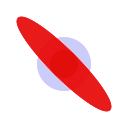

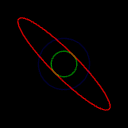

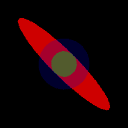

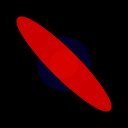

------------------


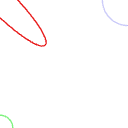

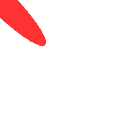

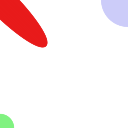

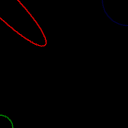

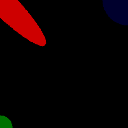

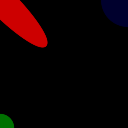

------------------


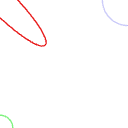

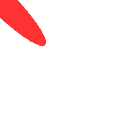

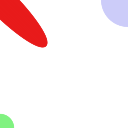

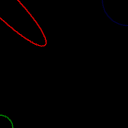

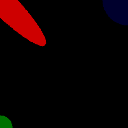

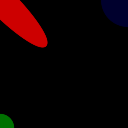

------------------


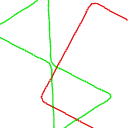

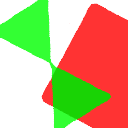

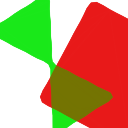

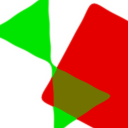

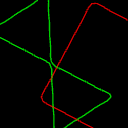

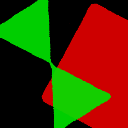

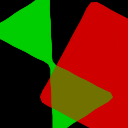

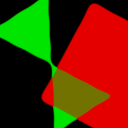

In [5]:
from lcmr.utils.colors import colors

raster_size = (128, 128)

for example_scene in [example_scene1, example_scene2, example_scene3, example_scene4]:
    print("-" * 18)
    for background_color in [colors.white, colors.black]:

        renderer = OpenGLRenderer2D(raster_size, background_color=background_color, contours_only=True)
        display_img(renderer.render(example_scene).image[0])

        renderer = PyDiffVgRenderer2D(raster_size, background_color=background_color, device=device, n_verts=64)
        display_img(renderer.render(example_scene.to(renderer.device)).image[0])

        renderer = PyTorch3DRenderer2D(raster_size, background_color=background_color, device=device, n_verts=64)
        display_img(renderer.render(example_scene.to(renderer.device)).image[0])

        if example_scene.layer.object.efd != None:
            renderer = SoftRasRenderer2D(raster_size, background_color=background_color)
            display_img(renderer.render(example_scene).image[0])